In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter, FuncAnimation

from src.io.datasets import CSVReader
from src.config.settings import get_settings

%matplotlib widget

In [2]:
settings = get_settings()

reader = CSVReader()

In [3]:
plays = reader.read(settings.get_tracking_file_path(week=7))
plays = plays[(plays.gameId == 2022102000) & (plays.playId == 4205)]
plays

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
6015328,2022102000,4205,37084.0,J.J. Watt,1,BEFORE_SNAP,2022-10-21 03:28:48.1,99.0,ARI,left,44.690000,33.200000,0.02,0.03,0.01,104.16,39.48,NaN
6015329,2022102000,4205,37084.0,J.J. Watt,2,BEFORE_SNAP,2022-10-21 03:28:48.2,99.0,ARI,left,44.690000,33.200000,0.02,0.02,0.01,99.09,37.88,NaN
6015330,2022102000,4205,37084.0,J.J. Watt,3,BEFORE_SNAP,2022-10-21 03:28:48.3,99.0,ARI,left,44.690000,33.210000,0.02,0.02,0.00,99.68,35.61,NaN
6015331,2022102000,4205,37084.0,J.J. Watt,4,BEFORE_SNAP,2022-10-21 03:28:48.4,99.0,ARI,left,44.690000,33.210000,0.01,0.02,0.01,99.68,29.66,NaN
6015332,2022102000,4205,37084.0,J.J. Watt,5,BEFORE_SNAP,2022-10-21 03:28:48.5,99.0,ARI,left,44.690000,33.210000,0.01,0.02,0.00,98.76,27.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6018612,2022102000,4205,NaN,football,139,AFTER_SNAP,2022-10-21 03:29:01.9,NaN,football,left,40.860001,54.669998,0.42,0.79,0.05,NaN,NaN,pass_outcome_incomplete
6018613,2022102000,4205,NaN,football,140,AFTER_SNAP,2022-10-21 03:29:02,NaN,football,left,40.889999,54.630001,0.35,0.74,0.04,NaN,NaN,NaN
6018614,2022102000,4205,NaN,football,141,AFTER_SNAP,2022-10-21 03:29:02.1,NaN,football,left,40.900002,54.610001,0.28,0.62,0.03,NaN,NaN,NaN
6018615,2022102000,4205,NaN,football,142,AFTER_SNAP,2022-10-21 03:29:02.2,NaN,football,left,40.919998,54.590000,0.22,0.53,0.03,NaN,NaN,NaN


In [4]:
disguise_data = reader.read(settings.FRAME_DISGUISE_RESULTS_FILE)

In [11]:
disguise_data[(disguise_data.gameId == 2022102000) & (disguise_data.playId == 4205)]['frameId']

421938     6
421939     7
421940     8
421941     9
421942    10
          ..
422303    75
422304    76
422305    77
422306    78
422307    79
Name: frameId, Length: 370, dtype: int64

In [5]:
disguise_data[(disguise_data.gameId == 2022102000) & (disguise_data.playId == 4205)]['frameId'].min()

np.int64(6)

In [6]:
disguise_data[(disguise_data.gameId == 2022102000) & (disguise_data.playId == 4205)]['frameId'].max()

np.int64(79)

In [7]:
79-6

73

In [10]:
143-73-6

64

In [8]:
blitz_data = disguise_data[disguise_data.wasInitialPassRusher == 1].sort_values(by="disguise_score", ascending=False)

KeyError: 'disguise_score'

In [26]:
blitz_data[blitz_data.displayName == "Chris Harris"]

,gameId,playId,nflId,jerseyNumber,club,position,displayName,wasInitialPassRusher,disguise_score,quarterbackHit,causedPressure,tackleForALoss
16033,2022110700,3059,37724,19,NO,CB,Chris Harris,1,0.999981,0,False,0
11129,2022103006,3593,37724,19,NO,CB,Chris Harris,1,0.996361,0,False,0
12752,2022103006,2724,37724,19,NO,CB,Chris Harris,1,0.991715,0,False,0
4292,2022101605,3503,37724,19,NO,CB,Chris Harris,1,0.989072,0,False,0
12406,2022103006,101,37724,19,NO,CB,Chris Harris,1,0.987984,0,True,0
13040,2022103006,1596,37724,19,NO,CB,Chris Harris,1,0.986973,0,False,0
2796,2022101605,1542,37724,19,NO,CB,Chris Harris,1,0.938256,0,False,0
291,2022101605,1196,37724,19,NO,CB,Chris Harris,1,0.934946,0,False,0
12106,2022103006,3543,37724,19,NO,CB,Chris Harris,1,0.914854,0,True,0
13124,2022103006,3519,37724,19,NO,CB,Chris Harris,1,0.902786,0,False,0


In [27]:
blitz_data[(blitz_data.gameId == 2022110700) & (blitz_data.playId == 3059)]

,gameId,playId,nflId,jerseyNumber,club,position,displayName,wasInitialPassRusher,disguise_score,quarterbackHit,causedPressure,tackleForALoss
16033,2022110700,3059,37724,19,NO,CB,Chris Harris,1,0.999981,0,False,0
16034,2022110700,3059,40017,32,NO,FS,Tyrann Mathieu,1,0.442171,0,False,0


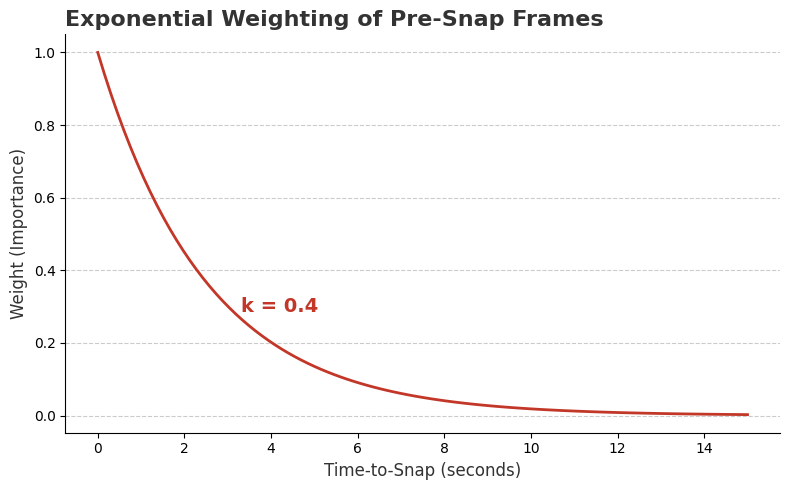

In [29]:
# Ensure that the plot appears inline in a Jupyter notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Define the exponential decay function
def exponential_decay(T, k=0.4):
    return np.exp(-k * T)

# Time-to-snap values (in seconds)
T_values = np.linspace(0, 15, 100)  # Time from 0 to 15 seconds before the snap

# Calculate the weights using the exponential decay function
weights = exponential_decay(T_values)

# Create the plot with 'The Economist' style
plt.figure(figsize=(8, 5))

# Plot the decay curve
plt.plot(T_values, weights, color='#c23728', linewidth=2)

# Add the title and axis labels with a minimalist approach
plt.title('Exponential Weighting of Pre-Snap Frames', fontsize=16, fontweight='bold', color='#333333', loc='left')
plt.xlabel('Time-to-Snap (seconds)', fontsize=12, color='#333333')
plt.ylabel('Weight (Importance)', fontsize=12, color='#333333')

# Add annotation for k value
plt.text(4.2, 0.3, f'k = {0.4}', color='#c23728', fontsize=14, ha='center', va='center', fontweight='bold')

# Customize the grid for a more minimalist look
plt.grid(True, which='both', axis='y', linestyle='--', color='#999999', alpha=0.5)

# Adjust ticks to make the axes cleaner
plt.tick_params(axis='x', labelsize=10, width=0.8)
plt.tick_params(axis='y', labelsize=10, width=0.8)

# Use minimalist axis lines and remove top/right axes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.8)
plt.gca().spines['bottom'].set_linewidth(0.8)

# Adjust the layout for better spacing
plt.tight_layout()

plt.savefig('../reports/figures/exponential_decay.png', bbox_inches='tight')